In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import scipy.spatial
import scipy.optimize
import sys

def print_fl(output):
    print(output)
    sys.stdout.flush()
    
from PERMSimulation import PERMSimulation

#import warnings
#warnings.simplefilter("error")

In [2]:
testSim = PERMSimulation()

testSim.F = 0.01
testSim.initialise(10000,10000)
%time testSim.run_simulation()

I: 1	 n: 10000	 p: 0	 e: 0	 w: 1.711830e+00
I: 2	 n: 10000	 p: 0	 e: 0	 w: 2.250305e+00
I: 3	 n: 10000	 p: 0	 e: 0	 w: 2.779726e+00
I: 4	 n: 10000	 p: 66	 e: 66	 w: 3.362286e+00
I: 5	 n: 10000	 p: 223	 e: 223	 w: 4.023900e+00
I: 6	 n: 10000	 p: 279	 e: 279	 w: 4.784225e+00
I: 7	 n: 10000	 p: 308	 e: 308	 w: 5.672532e+00


/Users/jesse/Code/comp-phys-2016-mc/PERMSimulation.py:91: RuntimeWarning: invalid value encountered in true_divide
  theta_probabilities = np.nan_to_num(theta_boltzmann / self.capital_Ws[:,self.iteration,np.newaxis])


I: 8	 n: 10000	 p: 309	 e: 309	 w: 6.659476e+00
I: 9	 n: 10000	 p: 371	 e: 371	 w: 7.832313e+00
I: 10	 n: 10000	 p: 346	 e: 346	 w: 9.151703e+00
I: 11	 n: 10000	 p: 314	 e: 314	 w: 1.062633e+01
I: 12	 n: 10000	 p: 327	 e: 327	 w: 1.236094e+01
I: 13	 n: 10000	 p: 361	 e: 361	 w: 1.429433e+01
I: 14	 n: 10000	 p: 379	 e: 379	 w: 1.656368e+01
I: 15	 n: 10000	 p: 347	 e: 347	 w: 1.909224e+01
I: 16	 n: 10000	 p: 331	 e: 331	 w: 2.209219e+01
I: 17	 n: 10000	 p: 356	 e: 356	 w: 2.560894e+01
I: 18	 n: 10000	 p: 370	 e: 370	 w: 2.962650e+01
I: 19	 n: 10000	 p: 355	 e: 355	 w: 3.416642e+01
I: 20	 n: 10000	 p: 349	 e: 349	 w: 3.961659e+01
I: 21	 n: 10000	 p: 362	 e: 362	 w: 4.594010e+01
I: 22	 n: 10000	 p: 353	 e: 353	 w: 5.312461e+01
I: 23	 n: 10000	 p: 355	 e: 355	 w: 6.081281e+01
I: 24	 n: 10000	 p: 362	 e: 362	 w: 7.001478e+01
I: 25	 n: 10000	 p: 344	 e: 344	 w: 8.047533e+01
I: 26	 n: 10000	 p: 354	 e: 354	 w: 9.242783e+01
I: 27	 n: 10000	 p: 379	 e: 379	 w: 1.057612e+02
I: 28	 n: 10000	 p: 37

(250,)
[ 0.84907671  0.74768545]


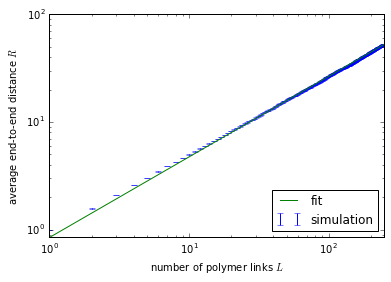

In [4]:
r_e2e = np.average(testSim.results_r_e2e, axis=0, weights=testSim.results_pol_weights)

dev_r_e2e = (testSim.results_r_e2e - r_e2e)**2
var_r_e2e = np.average(dev_r_e2e, axis=0, weights=testSim.results_pol_weights) / testSim.n
print(r_e2e.shape)
lengths = np.arange(0,np.size(r_e2e))
x = lengths[:]
y = r_e2e[:]
p, _ = scipy.optimize.curve_fit(lambda x,a,v: a*(x**v), x, y, p0=np.array([1, 0.75]))
print(p)

fig = plt.figure()
ax = plt.gca()
ax.set_yscale('log')
ax.set_xscale('log')
ax.errorbar(x, y, yerr=np.sqrt(var_r_e2e), label="simulation", linestyle="None")
ax.plot(x, p[0]*(x**p[1]), label="fit")

ax.set_ylim(p[0],10**np.ceil(np.math.log(np.max(r_e2e), 10)))
ax.set_xlim(0,np.size(r_e2e))

plt.xlabel(r"number of polymer links $L$")
plt.ylabel(r"average end-to-end distance $R$")

plt.legend(loc=4)
plt.show()


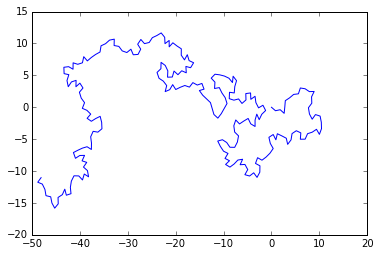

In [9]:
i = 7

plt.plot(testSim.r[i,:,0], testSim.r[i,:,1])
plt.show()

In [ ]:
testSim.pol_weights.shape[0]

In [ ]:
a = np.arange(10)

In [ ]:
a[-0:]